In [196]:
import pandas as pd 
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import plotly as pl
import plotly.express as px
import seaborn as sns
from __future__ import print_function

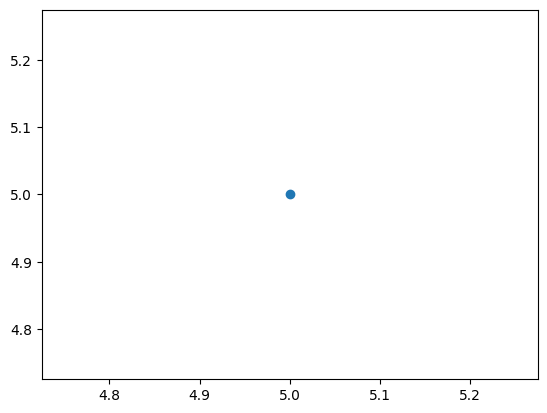

In [13]:
plt.plot(5,5, 'o')
plt.show()

In [12]:
spending_df.groupby(by = 'TIME_PERIOD').sum().plot(kind='line', y = 'OBS_VALUE')

NameError: name 'spending_df' is not defined

<Axes: ylabel='Frequency'>

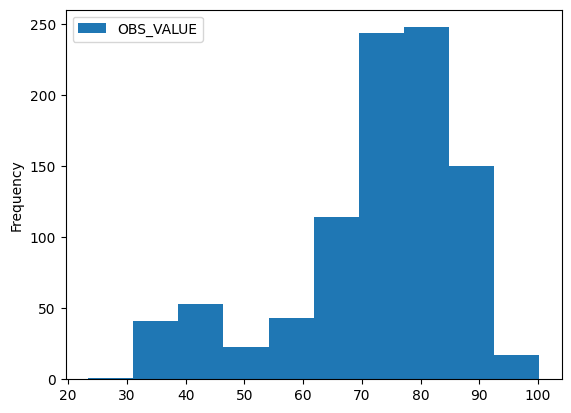

In [ ]:
spending_df.plot(kind='hist', y='OBS_VALUE')

In [14]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                          sheet_name='Canada by Citizenship',skiprows=range(20), skipfooter=2)


In [17]:
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [18]:
df_can.drop(columns=['Type','Coverage', 'AREA', 'DEV','REG'], inplace=True)

In [23]:
df_can.shape

(195, 38)

In [25]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OdName    195 non-null    object
 1   AreaName  195 non-null    object
 2   RegName   195 non-null    object
 3   DevName   195 non-null    object
 4   1980      195 non-null    int64 
 5   1981      195 non-null    int64 
 6   1982      195 non-null    int64 
 7   1983      195 non-null    int64 
 8   1984      195 non-null    int64 
 9   1985      195 non-null    int64 
 10  1986      195 non-null    int64 
 11  1987      195 non-null    int64 
 12  1988      195 non-null    int64 
 13  1989      195 non-null    int64 
 14  1990      195 non-null    int64 
 15  1991      195 non-null    int64 
 16  1992      195 non-null    int64 
 17  1993      195 non-null    int64 
 18  1994      195 non-null    int64 
 19  1995      195 non-null    int64 
 20  1996      195 non-null    int64 
 21  1997      195 no

In [26]:
df_can = df_can.copy().melt(id_vars = ['OdName', 'AreaName', 'RegName', 'DevName'], 
                            var_name='immigration_year', value_name='number_of_immigrants')

In [27]:
df_can.head(5)

,OdName,AreaName,RegName,DevName,immigration_year,number_of_immigrants
0,Afghanistan,Asia,Southern Asia,Developing regions,1980,16
1,Albania,Europe,Southern Europe,Developed regions,1980,1
2,Algeria,Africa,Northern Africa,Developing regions,1980,80
3,American Samoa,Oceania,Polynesia,Developing regions,1980,0
4,Andorra,Europe,Southern Europe,Developed regions,1980,0


In [28]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   OdName                6630 non-null   object
 1   AreaName              6630 non-null   object
 2   RegName               6630 non-null   object
 3   DevName               6630 non-null   object
 4   immigration_year      6630 non-null   object
 5   number_of_immigrants  6630 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 310.9+ KB


In [29]:
df_can.rename(columns = {'OdName':'country', 'AreaName':'continent', 'RegName':'region', 'DevName':'development'}, inplace=True)

In [30]:
df_can.columns

Index(['country', 'continent', 'region', 'development', 'immigration_year',
       'number_of_immigrants'],
      dtype='object')

<Axes: ylabel='Frequency'>

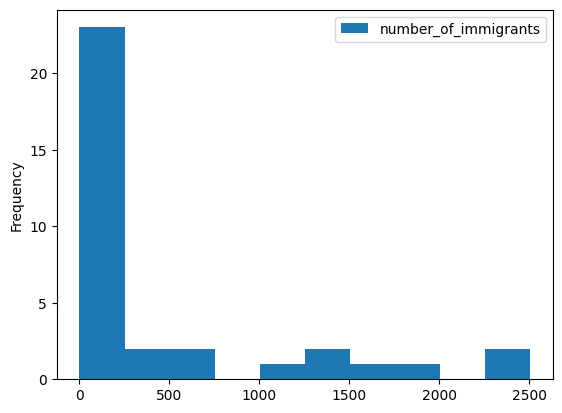

In [42]:
df_can[df_can['country'].str.lower().str.contains('cameroon')].plot(kind='hist', y='number_of_immigrants')

<Axes: xlabel='immigration_year'>

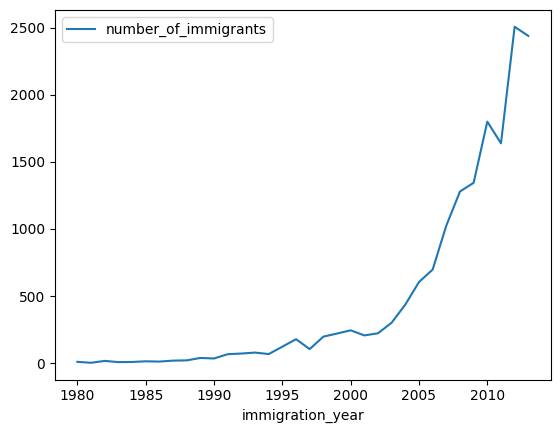

In [43]:
df_can.loc[df_can['country'].str.lower().str.contains('cameroon')].plot(kind='line', x = 'immigration_year', y='number_of_immigrants')

Text(0, 0.5, 'Number of Immigrants')

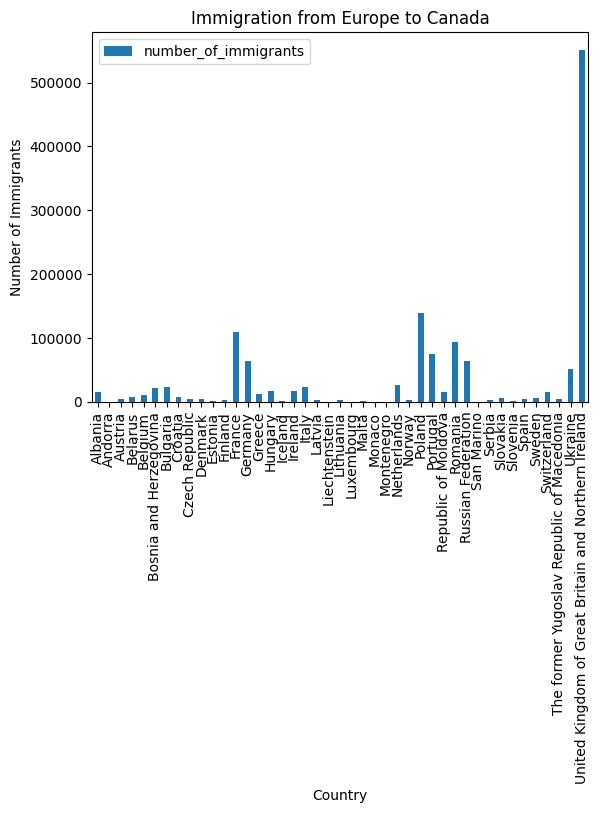

In [49]:
df_can.loc[df_can['continent'].str.lower().str.contains('europe')].groupby(by='country').sum().plot(kind='bar', y='number_of_immigrants')
plt.title('Immigration from Europe to Canada')
plt.xlabel('Country')   
plt.ylabel('Number of Immigrants')

Area Chart: Visualises the magnetude and proportion of multiple variables over a continuous axis. This axis can be
a time or an ordered dimension.

In the next blocks, immigration to canada from top 5 countries will be determined then *area* plots using two options will be used to visualise the results.

In [56]:
top_5 = df_can.groupby(by = 'country').sum().sort_values(by= 'number_of_immigrants', ascending = False).head(5).index.tolist()   
top_5

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

In this option, the index of the spread data will be set so that the axes of the area plot can be explicitly parsed in the plot. Also, inline renaming of columns is possible.

Text(0, 0.5, 'Number of Immigrants')

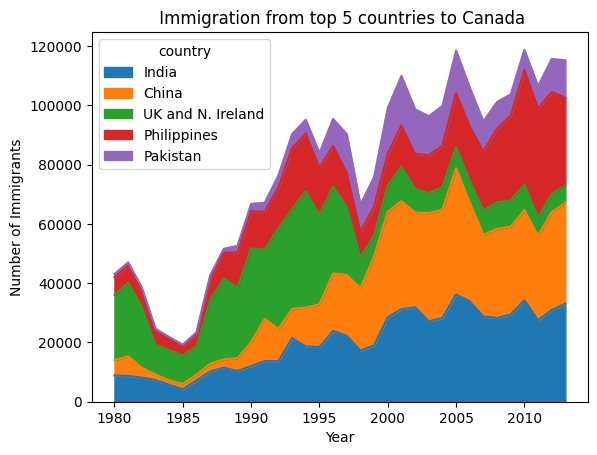

In [92]:
df_can.loc[df_can['country'].isin(top_5),['country','immigration_year','number_of_immigrants']].pivot(index= 'immigration_year', columns = 'country', values = 'number_of_immigrants').reset_index().rename(columns = {'United Kingdom of Great Britain and Northern Ireland' : 'UK and N. Ireland'}).plot(kind = 'area', x = 'immigration_year', y = ['India',
 'China',
 'UK and N. Ireland',
 'Philippines',
 'Pakistan'])
plt.title(' Immigration from top 5 countries to Canada')
plt.xlabel('Year') 
plt.ylabel('Number of Immigrants')

This option is much more simpler as the dataframe from the pivot is parsed to the area plot. The area plot uses implicitly uses the index of the dataframe as the x-axis.
In this option, it is not possible to rename colomn names inline.

<Axes: xlabel='immigration_year'>

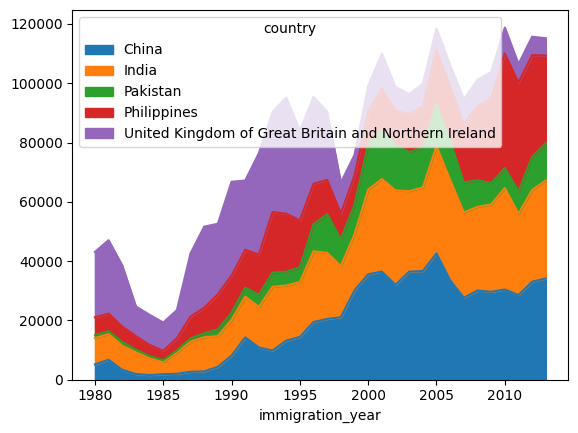

In [95]:
df_can.loc[df_can['country'].isin(top_5),['country','immigration_year','number_of_immigrants']].pivot(index= 'immigration_year', columns = 'country', values = 'number_of_immigrants').plot(kind = 'area')

Histograms: used to analyse the frequency distribution of a numeric dataset.

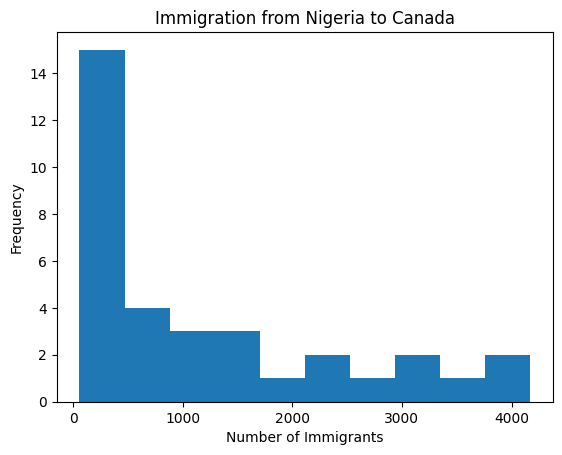

In [110]:
condition = df_can['country'].str.lower().str.strip() == 'nigeria'
nigeria_df = df_can.loc[condition, 'number_of_immigrants'].reset_index()
count, binsize = np.histogram(nigeria_df['number_of_immigrants'], bins=10)
plt.hist(nigeria_df['number_of_immigrants'], bins=binsize)
plt.title('Immigration from Nigeria to Canada')
plt.xlabel('Number of Immigrants')
plt.ylabel('Frequency')
plt.show()


Immigration to canada in 2012

Text(0, 0.5, 'frequency')

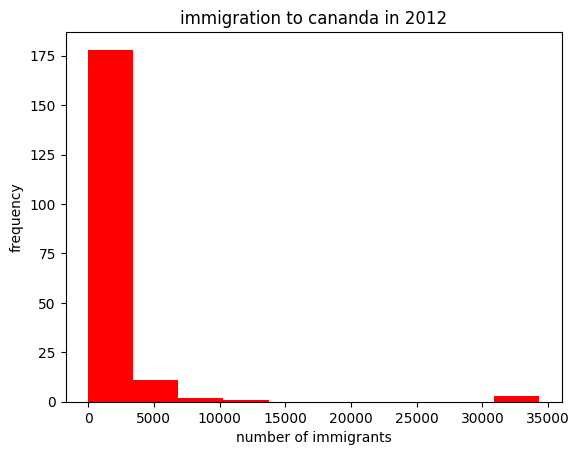

In [115]:
cond = df_can['immigration_year'].astype(int) == 2012
ct, bins = np.histogram(df_can.loc[cond, 'number_of_immigrants'])
plt.hist(df_can.loc[cond, 'number_of_immigrants'], bins=bins, color='red')
plt.title('immigration to cananda in 2012')
plt.xlabel('number of immigrants')
plt.ylabel('frequency')

Bar Chart

In [128]:
def get_data(country_name, lower_bound, upper_bound):
    if upper_bound <= lower_bound:
        print('The requested data is not sufficient for the task')
        breakpoint()
    condition = (df_can['country'].str.lower().str.strip() == country_name.strip()
                 ) & (
        df_can['immigration_year'].isin(range(lower_bound, upper_bound + 1))
                     )
    return df_can.loc[condition, ['immigration_year', 'number_of_immigrants']]

<Axes: xlabel='immigration_year'>

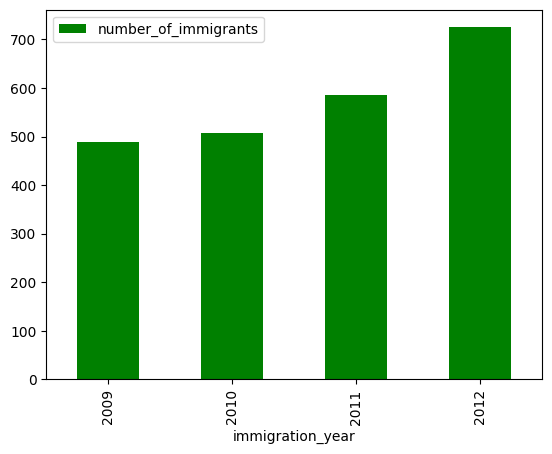

In [131]:
# plotting the bar chart from retrieved data
df = get_data('kenya', 2009, 2012)
df.plot(kind = 'bar',x='immigration_year', y='number_of_immigrants', color = 'green')

Pie Charts

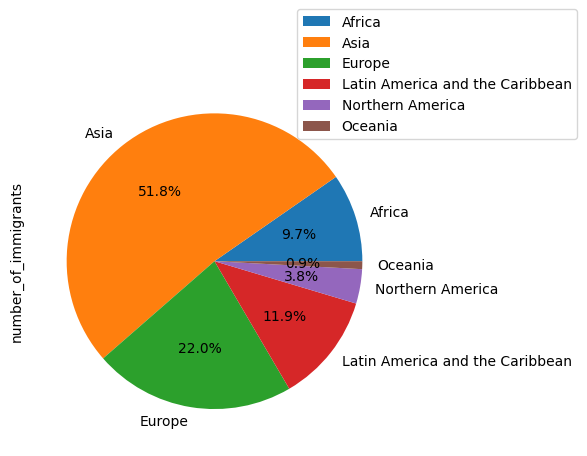

In [157]:
df_can.loc[:, ['continent','number_of_immigrants']].groupby(by = 'continent').sum().plot(kind = 'pie', y = 'number_of_immigrants', autopct='%1.1f%%')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.2))
plt.show()

Box Plots: A way to distribute statistically distribute data through five dimensions. These dimensions include
- Minimum: Obtained by subtracting the the first quartile from the inter quartile range (iqr)*1.5
- First Quartile: 25 % of the observed values are <= this value
- Median: middle value of the data
- Third Quartile: 75 % of the observed values are <= this value
- Maximum: Obtained by addint the third quartile to 1.5*iqr
- Outliers (not part of the dimensions and appear below the minimum or above the maximum)

The IQR contain 50% of the observed values.

C:\Users\emman\AppData\Local\Temp\ipykernel_11612\619878556.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.2))


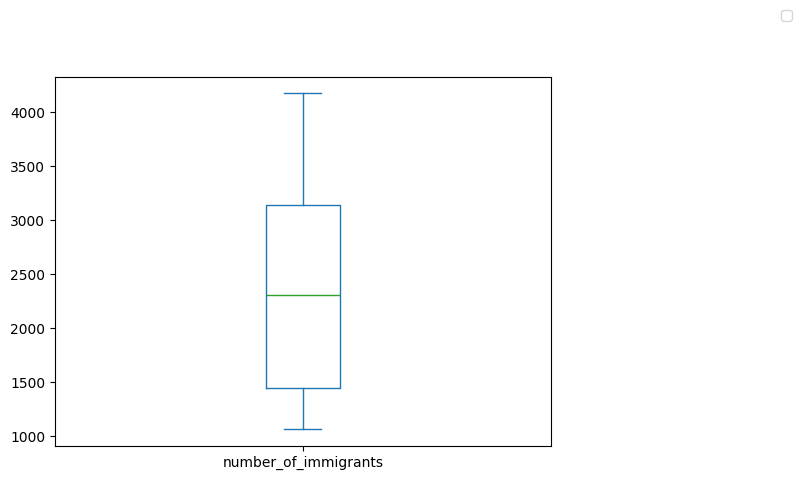

In [165]:
df_country = get_data('nigeria', 2000, 2013)
df_country.plot(kind = 'box', y = 'number_of_immigrants')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.2))
plt.show()

Scatter plots

C:\Users\emman\AppData\Local\Temp\ipykernel_11612\3708835847.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.2))


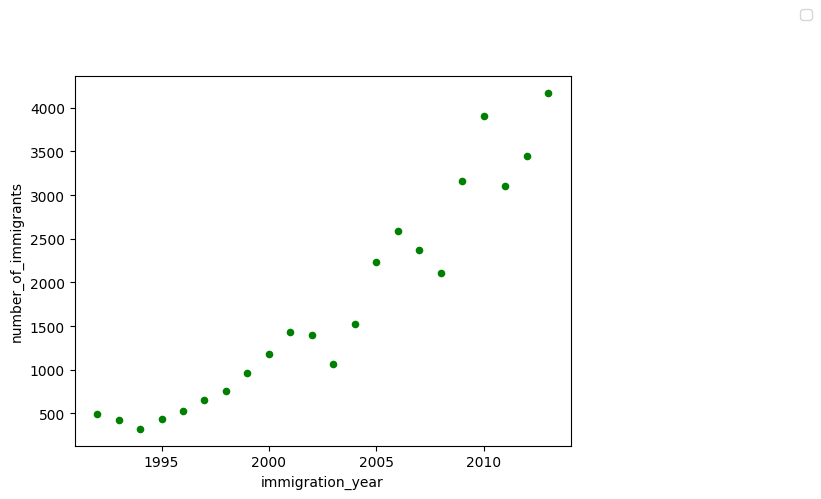

In [167]:
df_country = get_data('nigeria', 1992, 2013)
df_country.plot(kind = 'scatter',x = 'immigration_year', y = 'number_of_immigrants', color = 'green')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.2))
plt.show()

<Axes: xlabel='immigration_year', ylabel='number_of_immigrants'>

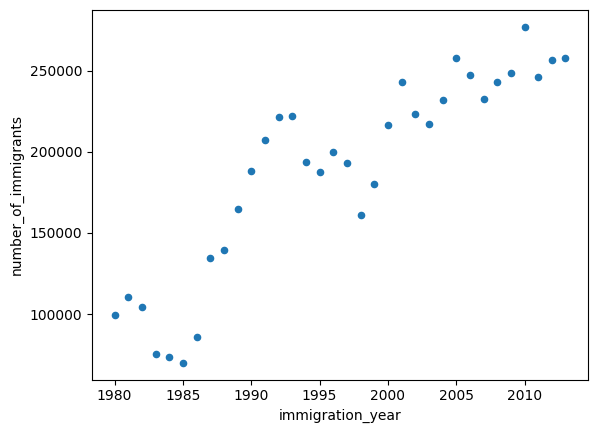

In [191]:
df_can.groupby(by = 'immigration_year').sum().reset_index().plot(kind = 'scatter', x = 'immigration_year', y = 'number_of_immigrants')

Treemaps: A visualization type that displays data using nested rectangles. Each category and subcategories are nested within rectangles.

In [184]:
df_subset = df_can[['continent', 'region', 'country', 'number_of_immigrants']].groupby(by = ['continent', 'region', 'country']).sum().reset_index()

In [192]:
viz = px.treemap(df_subset, path= ['continent', 'region', 'country'], values = 'number_of_immigrants', title = 'number of immagrants to canada')
viz.show()

Plotting directily with Matplotlib

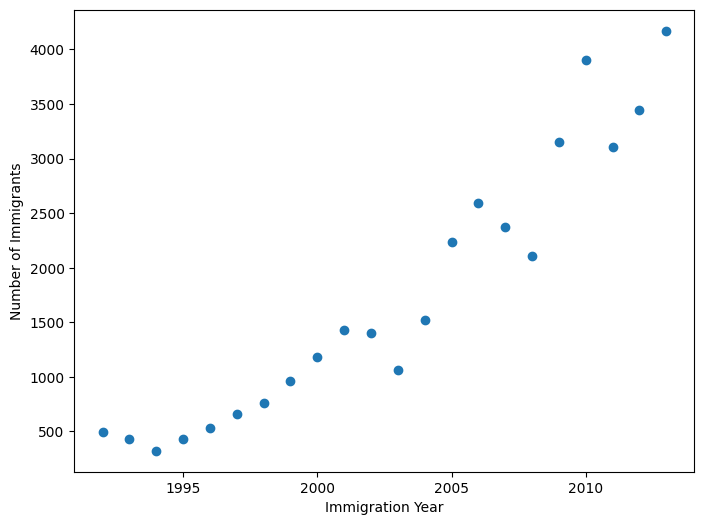

In [195]:
# This function creates a figure and axis object with a specified size of 8 inches by 6 inches. 
# The figure is the overall container for the plot, while the axis is the area where the data will be plotted. 
# This allows for better control over the layout and appearance of the plot.
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(df_country['immigration_year'], df_country['number_of_immigrants'])
ax.set_xlabel('Immigration Year')
ax.set_ylabel('Number of Immigrants')
plt.show()

Introduction to Plotly
Plotly graph objects: This is a low-level interface to figures, traces and layout. Its top level class is
plotly.graph_objects.Figure
Plotly Express: This is a high-level wrapper for plotly. It is the recommendable starting point for using plotly.



In [198]:
## import required packages
import plotly.graph_objects as go
import plotly.express as px 

The following three blocks of code demonstrate how to use graph_objects to create plots.

In [208]:
# create an empty figure 
country_data_sa = get_data('south africa', 1990, 2012)
fig = go.Figure()
fig.add_trace(go.Scatter(x = country_data_sa['immigration_year'], y = country_data_sa['number_of_immigrants'], mode = 'markers', marker = dict(color = 'orange')))
fig.update_layout(title = 'Immigration from South Africa to Canada', xaxis_title = 'immigration year', yaxis_title = 'number of immigrants')
fig.show()

In [212]:
# create an empty figure 
country_data = get_data('ghana', 1990, 2012)
fig = go.Figure()
fig.add_trace(go.Scatter(x = country_data['immigration_year'], y = country_data['number_of_immigrants'], mode = 'lines', marker = dict(color = 'orange')))
fig.add_trace(go.Scatter(x = country_data_sa['immigration_year'], y = country_data_sa['number_of_immigrants'], mode = 'lines', marker = dict(color = 'green')))
fig.update_layout(title = 'Immigration from Ghana and South Africa to Canada', xaxis_title = 'immigration year', yaxis_title = 'number of immigrants')
fig.show()

In [211]:
country_data = get_data('ghana', 1990, 2012)
fig = go.Figure()
fig.add_trace(go.Scatter(x = country_data['immigration_year'], y = country_data['number_of_immigrants'], mode = 'lines', marker = dict(color = 'orange')))
fig.update_layout(title = 'Immigration from Ghana to Canada', xaxis_title = 'immigration year', yaxis_title = 'number of immigrants')
fig.show()

The following blocks demonstrate how to use plotly express to create visualizations.

In [213]:
fg = px.bar(x= df_country['immigration_year'], y = df_country['number_of_immigrants'], title = 'Immigration from Nigeria to Canada')
fg.show()

In [215]:
df_de = df_can.loc[df_can['country'].str.lower().str.strip() == 'germany', 'number_of_immigrants']
his_de = px.histogram(x = df_de, title = 'distribution of immigrants from germany to canada')
his_de.show()

In [ ]:
north_africa = df_can.loc[df_can['region'].str.lower().str.strip() == 'northern africa', ['country', 'number_of_immigrants']].groupby(by = 'country').sum().reset_index()



,country,number_of_immigrants
0,Algeria,69439
1,Egypt,72745
2,Libya,4909
3,Morocco,72267
4,Sudan,18506


In [217]:
fg1 = px.scatter(north_africa, x = 'country', y = 'number_of_immigrants', 
                 size = 'number_of_immigrants', hover_name = 'country', 
                 title = 'Immigration from Northern Africa to Canada', size_max = 50)
fg1.show()

#Pie

In [218]:
fg2 = px.pie(north_africa, names = 'country', values = 'number_of_immigrants')
fg2.show()

In [219]:
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
    title="Family chart"
)
fig.show()